Imported necessary modules

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Reading the csv file and replacing the null values with 0

In [ ]:
food_dataset = pd.read_csv("/content/food_updated.txt")

food_dataset = food_dataset.replace("~", 0)

Data visualization : Food list vs calories

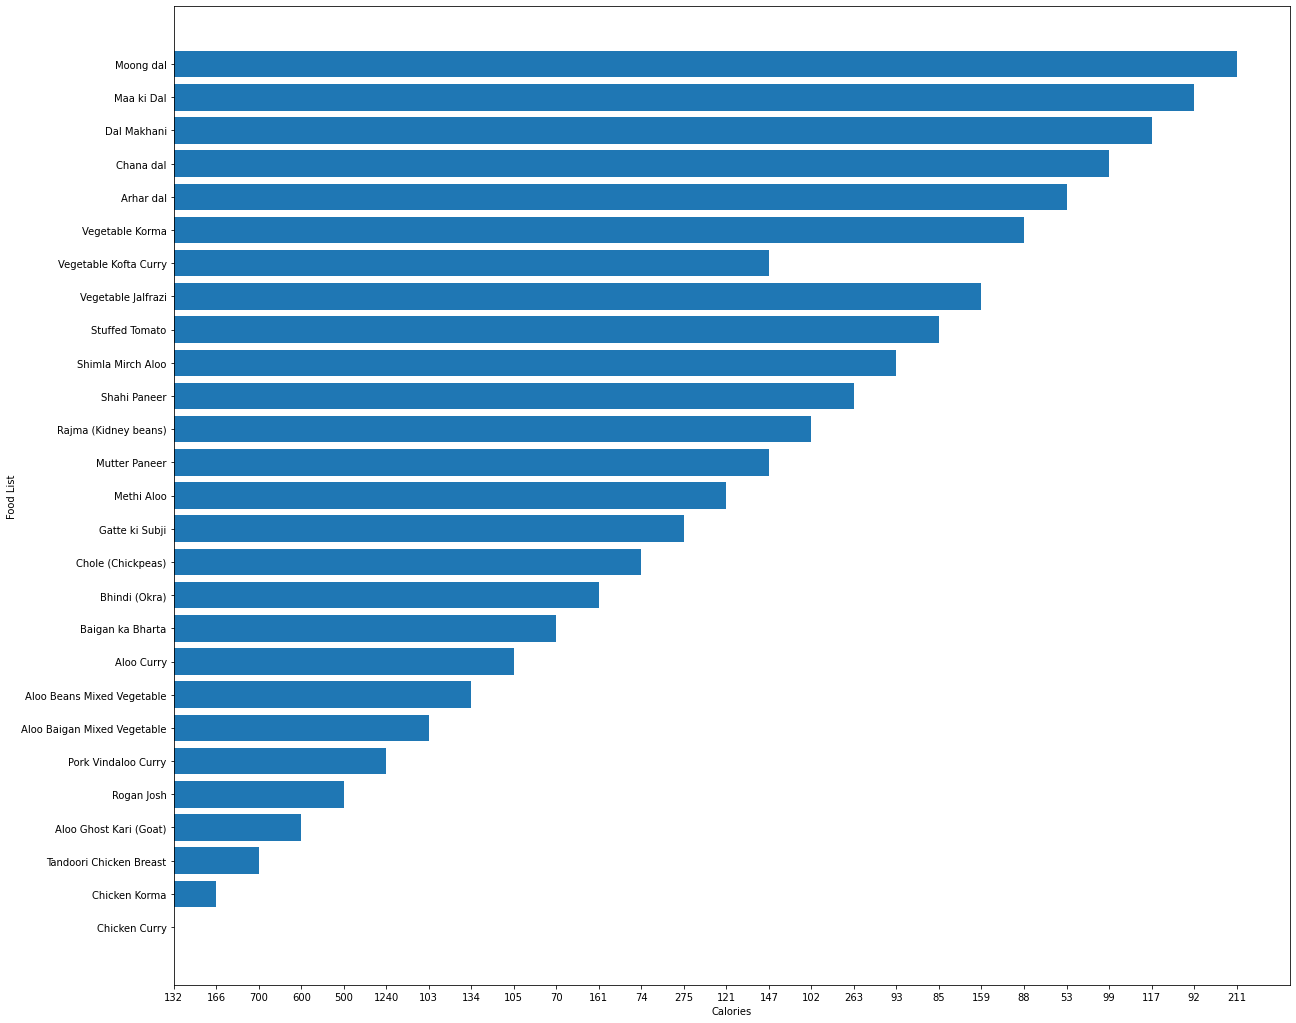

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
plt.barh(food_dataset["Food List"], food_dataset["Calories"].astype(str))
plt.ylabel("Food List")
plt.xlabel("Calories")
plt.show()

Calories vs Protein

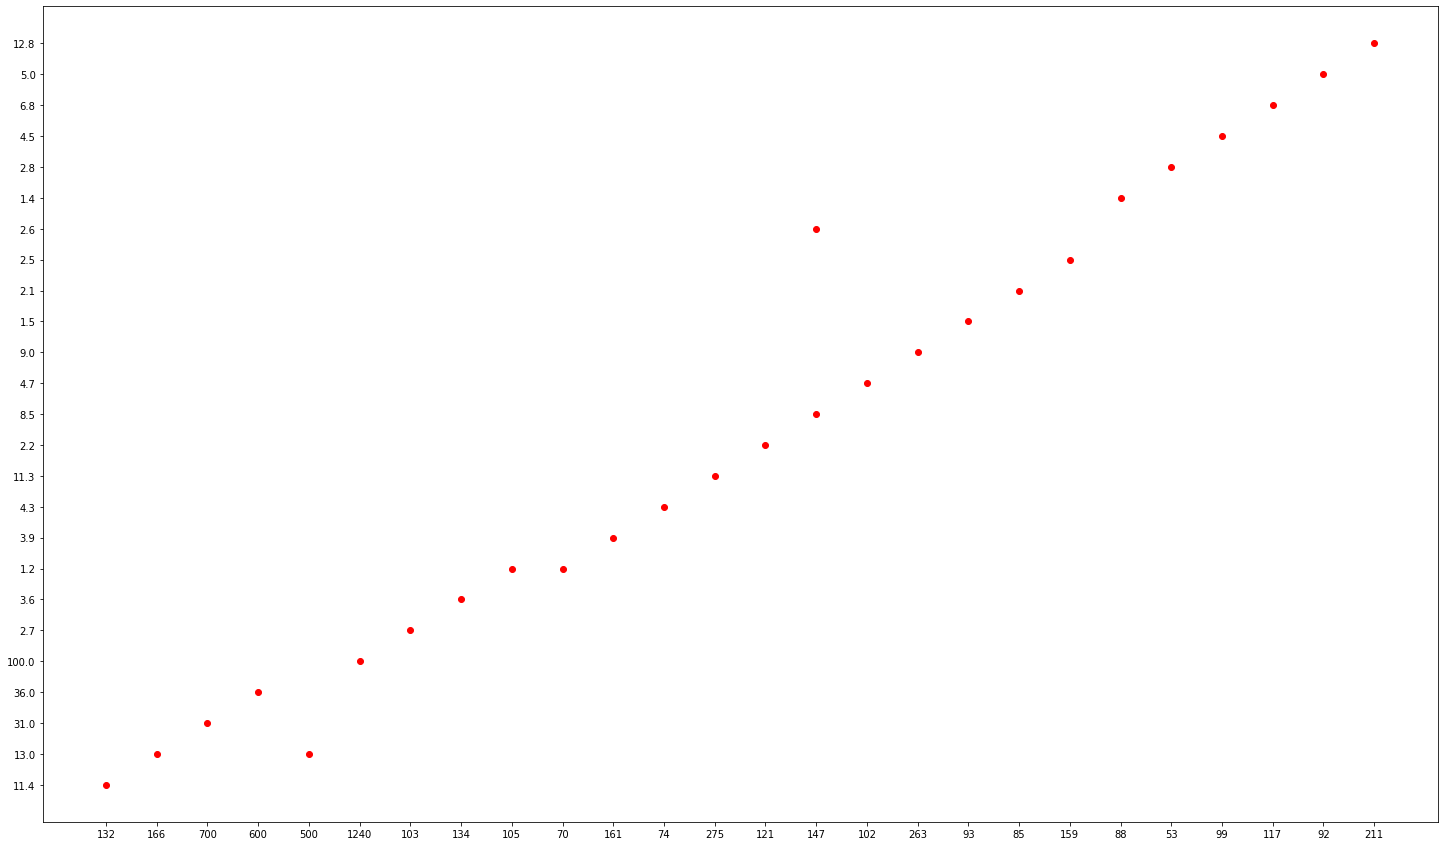

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(food_dataset["Calories"].astype(str),food_dataset["Protein (g)"].astype(str),linewidth=0, marker = 'o', color = 'red')
plt.show()

Giving the input and target variables

In [ ]:
X = food_dataset[['Portion (g)', 'Carbohydrates (g)', 'Protein (g)', 'Total Fat (g)']]
y = food_dataset['Calories']

Splitting the data between training and testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,Portion (g),Carbohydrates (g),Protein (g),Total Fat (g)
20,100,13.3,2.6,9.1
11,100,3.3,4.3,4.1
16,95,5.5,9.0,22.0
8,100,14.4,1.2,5.0
13,100,16.0,2.2,5.4
10,100,12.1,3.9,10.7
24,100,14.0,6.8,1.3
21,100,8.7,1.4,5.3
26,100,31.3,12.8,3.7
0,100,4.5,11.4,7.6


In [ ]:
X_test

,Portion (g),Carbohydrates (g),Protein (g),Total Fat (g)
25,146,7.0,5.0,5.0
5,620,24.0,100.0,70.0
7,100,18.6,3.6,8.7
3,100,7.0,36.0,44.0
18,100,11.0,2.1,3.4
19,98,11.0,2.5,11.0


In [ ]:
y_train

20    147
11     74
16    263
8     105
13    121
10    161
24    117
21     88
26    211
0     132
2     700
6     103
14    147
17     93
22     53
23     99
1     166
4     500
9      70
15    102
12    275
Name: Calories, dtype: int64

In [ ]:
y_test

25      92
5     1240
7      134
3      600
18      85
19     159
Name: Calories, dtype: int64

Building a Linear Regression Model

In [ ]:
regr = LinearRegression()
model = regr.fit(X_train, y_train)

Predicting the Calories based on the nutrients

In [ ]:
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results.head()

,Actual,Predicted
25,92,31.757202
5,1240,1304.475542
7,134,137.994860
3,600,939.056212
18,85,57.223235


In [80]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test.astype(str), y_pred.astype(str))
accuracy

0.0